In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

## Load edge list of the GEM

In [161]:
df = pd.read_csv('toy.csv')

In [162]:
df.shape

(26, 2)

In [163]:
'''
Reactions names to integer ID
'''
from sklearn.preprocessing import LabelEncoder

rxn = pd.concat([df['s'], df['t']])

le = LabelEncoder()
le.fit_transform(rxn)

df['s'] = le.transform(df['s'])
df['t'] = le.transform(df['t'])

In [164]:
from networkx import from_pandas_edgelist

G = from_pandas_edgelist(df, source='s', target='t')
print('Nodes =', G.number_of_nodes())
print('Edges = ', G.number_of_edges())

Nodes = 15
Edges =  26


Number of nodes (reactions): 15


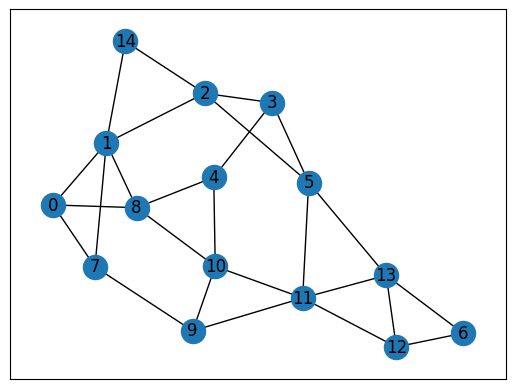

In [165]:
print('Number of nodes (reactions):', len(G.nodes))
nx.draw_networkx(G)
plt.show()

threshold 0.21428571428571427


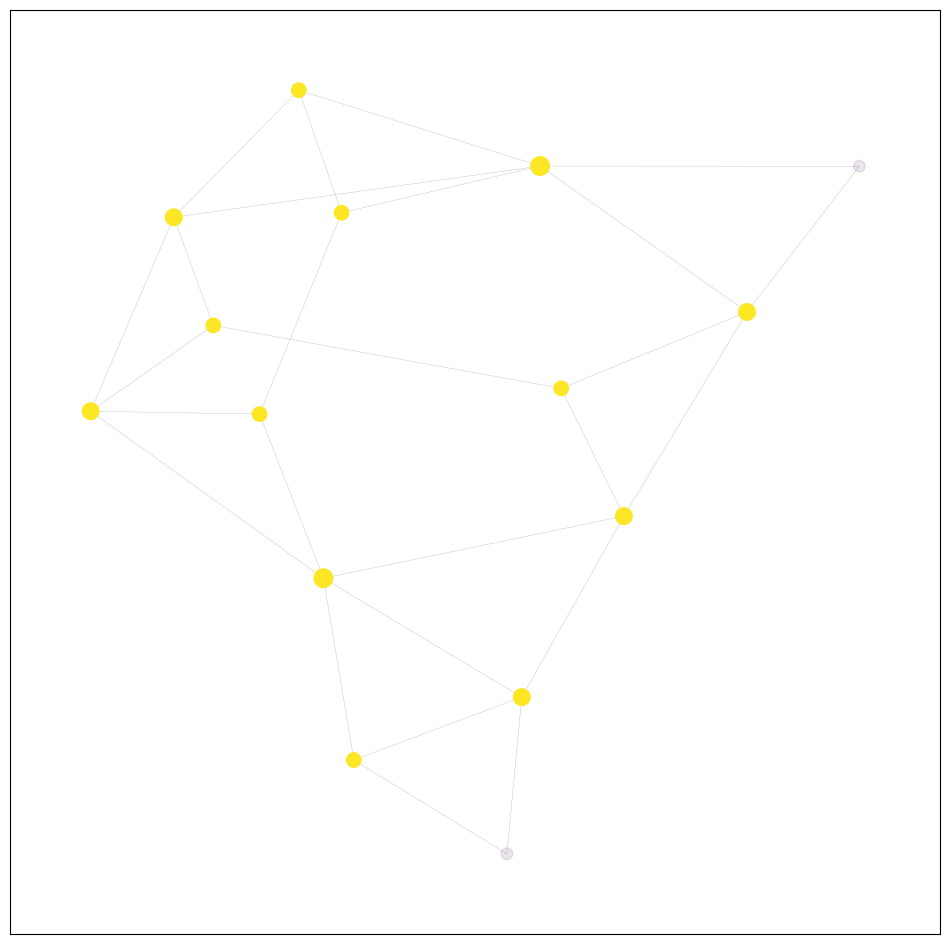

In [167]:
pos = nx.spring_layout(G, seed=42)
cent = nx.degree_centrality(G)

node_size = list(map(lambda x: x * 500, cent.values()))
cent_array = np.array(list(cent.values()))
threshold = sorted(cent_array, reverse=True)[10]
print("threshold", threshold)
cent_bin = np.where(cent_array >= threshold, 1, 0.1)

plt.figure(figsize=(12, 12))
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_size,
                               node_color=cent_bin,
                               nodelist=list(cent.keys()),
                               alpha=cent_bin)

edges = nx.draw_networkx_edges(G, pos, width=0.25, alpha=0.3)
plt.show()

In [166]:
print("Network density:", nx.density(G))

Network density: 0.24761904761904763


__The density value implies that this is not very dense network (on a scale from 0-1).__

In [18]:
from operator import itemgetter

betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality
eigenvector_dict = nx.eigenvector_centrality(G) # Run eigenvector centrality

# Assign each to an attribute in your network
nx.set_node_attributes(G, betweenness_dict, 'betweenness')
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')

sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

for b in sorted_betweenness:
    print(b)

('r6', 0.25879120879120887)
('r14', 0.19267399267399266)
('r11', 0.16703296703296705)
('r10', 0.15421245421245422)
('r5', 0.13901098901098902)
('r8', 0.12106227106227106)
('r3', 0.10238095238095239)
('r4', 0.08956043956043958)
('r2', 0.06391941391941393)
('r12', 0.04395604395604395)
('r13', 0.040293040293040296)
('r7', 0.03553113553113554)
('r1', 0.009157509157509158)
('r15', 0.0)
('r9', 0.0)


In [19]:
pagerank_dict = nx.pagerank(G)
sorted_pagerank = sorted(pagerank_dict.items(), key=itemgetter(1), reverse=True)

for b in sorted_pagerank:
    print(b)

('r10', 0.09311545085451922)
('r6', 0.09166181650784694)
('r8', 0.07709086233681414)
('r11', 0.07616871328661975)
('r14', 0.07474948202171228)
('r3', 0.0746942855966424)
('r5', 0.07441971171306005)
('r7', 0.06045833389459797)
('r2', 0.05881685325096401)
('r12', 0.05858418644029616)
('r1', 0.058366122410184886)
('r13', 0.058285154677161624)
('r4', 0.05806132196684757)
('r15', 0.043512586775485314)
('r9', 0.042015118267247714)


#### Node Embedding using Deep Walk

In [121]:
from karateclub import DeepWalk

In [127]:
dw_model = DeepWalk(walk_number=10, walk_length=80, dimensions=64)
dw_model.fit(G)
embedding = dw_model.get_embedding()
print(embedding.shape)

(15, 64)


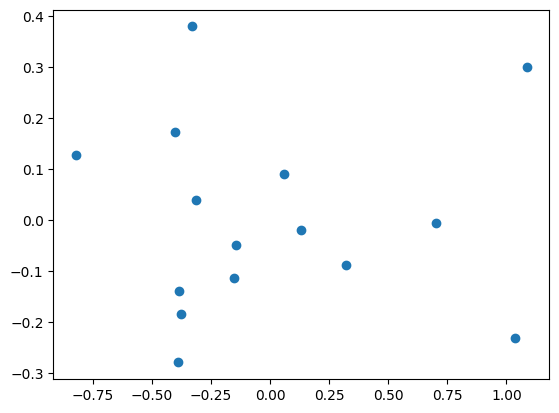

In [128]:
import sklearn

pca_model = sklearn.decomposition.PCA(n_components=2)
low_dim_embedding = pca_model.fit_transform(embedding)
plt.scatter(low_dim_embedding[:,0], low_dim_embedding[:,1])
plt.show()

### Clustering

In [129]:
from sklearn.cluster import KMeans

In [130]:
x = low_dim_embedding[:,0]
y = low_dim_embedding[:,1]

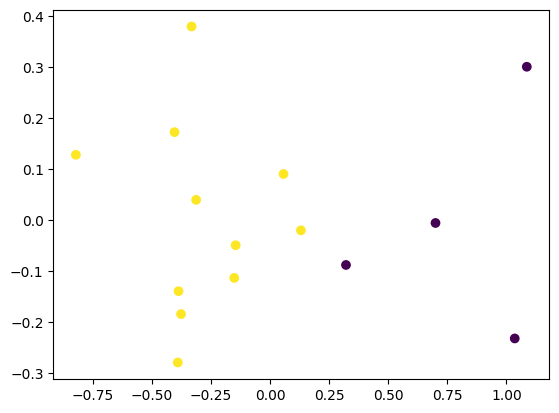

In [131]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(low_dim_embedding)

plt.scatter(x, y, c=kmeans.labels_)
plt.show() 

In [134]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1], dtype=int32)

In [143]:
le.transform([])

array([1])

In [159]:
for n in [6, 11, 12, 13]:
    print(le.inverse_transform([n]))

['r15']
['r6']
['r7']
['r8']
